# Lesson 4. Math in `numpy`

The numpy package provides many math functions. Among them are `abs`, `sign`, `sqrt`, `log`, `log10`, `exp`, trigonometric functions (`sin`, `cos` and `tan`), cyclometric functions (`arcsin`, `arccos` and `arctan`) hyperbolic and area functions (`sinh`, `cosh`, `tanh`, `arcsinh`, `arccosh` i `arctanh`) and many more. Numpy also contains numerical approximations of two mathematical constants $\pi$ and $e$.

In [ ]:
import numpy as np

print(np.pi, np.e)

3.141592653589793 2.718281828459045


In the case of computations (e.g., standard arithmetic operations) involving arrays, the operations are performed on individual elements, and the results are put in an array of results. Let's check following example. We will create the $A$ array with the dimension $2\times 2$ and then we will calculate $\sqrt{A}$, $2\cdot A$, $A+20$ and $\frac{100}{A}$

In [ ]:
import numpy as np

A=np.array([[1.,2.],[0.5,0.25]])
print(A,'\n')

print(np.sqrt(A),'\n')

print(2*A,'\n')

print(A + 20.,'\n')

print(100/A)


[[1.   2.  ]
 [0.5  0.25]] 

[[1.         1.41421356]
 [0.70710678 0.5       ]] 

[[2.  4. ]
 [1.  0.5]] 

[[21.   22.  ]
 [20.5  20.25]] 

[[100.  50.]
 [200. 400.]]


In fact, we have already used this feature of array calculations when creating charts. Let's see this:

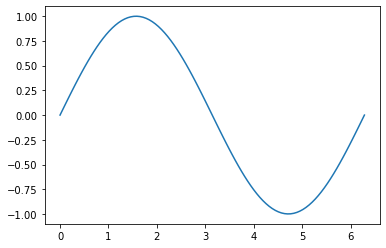

<class 'numpy.ndarray'> 1
<class 'numpy.ndarray'> 1


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x=np.linspace(0,2*np.pi,100)
y=np.sin(x)
plt.plot(x, y)
plt.show()

print(type(x), x.ndim)
print(type(y), y.ndim)


In the example above, we created a one-dimensional array (vector) $x$ and then calculated $y = \sin(x)$. We can see that $y$ is also a vector.

If we perform arithmetic operations (e.g. addition and subtraction) on arrays, these operations are also performed element by element. Also, multiplication and division are performed between each respective elements.

In [ ]:
import numpy as np

A=np.array([[1,2], [3,4]])
B=np.array([[.5,.25], [10,50]])

print(A+B)
print()
print(A-2*B)
print()
print(A*B)

[[ 1.5   2.25]
 [13.   54.  ]]

[[  0.    1.5]
 [-17.  -96. ]]

[[  0.5   0.5]
 [ 30.  200. ]]


The above operations require that the sizes (shapes) of the arrays match. In case of different sizes, an error will occur:

In [2]:
import numpy as np

A=np.array([[1,2], [3,4]])
C=np.array([[1,2,3],[4,5,6]])

print(A+C)

ValueError: ignored

In case when the data sizes (lengths) match, but there is a difference in the shape of the arrays (e.g. a vector of length $2$ and a square array $2 \times 2$), python will automatically extend (`broadcast`) the lower-dimensional array:

In [ ]:
import numpy as np

A=np.array([[1,2], [3,4]])
B=np.array([.25,.5])

print(A,'\n')
print(B,'\n')
print(A+B,'\n')
print(A*B)

[[1 2]
 [3 4]] 

[0.25 0.5 ] 

[[1.25 2.5 ]
 [3.25 4.5 ]] 

[[0.25 1.  ]
 [0.75 2.  ]]


As we can see, when adding $A + B$, python first extended the vector $B$ by the second line (identical to the first one) and then added the appropriate elements. The same happened with the multiplication of $AB$.

## Matrix and vector calculus

### The dot product

In the case of scalars (numbers), the dot product is simply the product of those numbers. The scalar (dot) product of vectors is defined as follows:

If we have two vectors $\vec a= [a_1, a_2, \ldots a_n]$ and $\vec b= [b_1, b_2, \ldots b_n]$, their dot product will be: $$\vec a\cdot \vec b =a_1\cdot b_1+a_2\cdot b_2+\ldots+a_n\cdot b_n=\sum_{i=1}^{n}a_i\cdot b_i$$

Let us also recall the definition of the matrix product:

We have two matrices:
$A=[[a_{11},a_{12},\ldots a_{1p}],[a_{21},a_{22},\ldots a_{2p}],\ldots[a_{n1},a_{n2},\ldots a_{np}]]$, oraz $B=[[b_{11},b_{12},\ldots b_{1m}],[b_{21},b_{22},\ldots b_{2m}],\ldots [b_{p1},b_{p2},\ldots b_{pm}]]$ 

with dimensions of $n\times p$ and $p\times m$, respectively. Their product will be the matrix $C = AB$ of dimensions $n\times m$ such that:

$$c_{ij}=a_{i1}\cdot b_{1j}+a_{i2}\cdot b_{2j}+\ldots a_{ip}\cdot b_{pj}=\sum_{k=1}^{p}a_{ik}\cdot b_{kj}$$

As you can easily see: from the above definitions follows, that the dot product of vectors can be represented by matrix multiplication if we treat the vectors as matrices of dimension $1 \times n$. Then:

$$\vec a \cdot \vec b = ab^T$$

After this short math interlude, we can go back to `numpy`. The dot symbol represents the dot product, so the corresponding function is called `dot()`. Let's test its operation:

In [1]:
import numpy as np

k=2
l=3
print('k={}, l={}, k⋅l={}\n'.format(k, l, np.dot(k,l)))

X=np.array([1,2,3])
Y=np.array([2,-3,-1])
print('x={}, y={}, x⋅y={}\n'.format(X, Y, np.dot(X,Y)))

A=np.array([[.5,.25], [10,50],[-2,-10]])
B=np.array([[1,2,4], [3,4,5]])

print('A={},\nB={},\nAB={}'.format(A, B, np.dot(A,B)))

k=2, l=3, k⋅l=6

x=[1 2 3], y=[ 2 -3 -1], x⋅y=-7

A=[[  0.5    0.25]
 [ 10.    50.  ]
 [ -2.   -10.  ]],
B=[[1 2 4]
 [3 4 5]],
AB=[[  1.25   2.     3.25]
 [160.   220.   290.  ]
 [-32.   -44.   -58.  ]]


The `numpy` package also provides other matrix operations. Let's transpose the matrices:

In [ ]:
import numpy as np

X=np.array([[1,2,4], [3,4,5]])

print(X)
print(np.transpose(X))

[[1 2 4]
 [3 4 5]]
[[1 3]
 [2 4]
 [4 5]]


The `numpy` package includes the `linalg` linear algebra library, containing other useful functions. We can calculate the determinant of a square matrix:

In [ ]:
import numpy as np

b = np.array([[6,1,1], [4, -2, 5], [2,8,7]]) 
print(b) 
print(np.linalg.det(b)) 

[[ 6  1  1]
 [ 4 -2  5]
 [ 2  8  7]]
-306.0


There are also more complicated functions, such as inverse matrix calculation:

In [ ]:
import numpy as np 

x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 
print(x) 
print(y) 
print(np.dot(x,y))

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


... as well as finding eigenvectors and eigenvalues of matrices:

In [ ]:
import numpy as np 

A = np.array([[1,2,3],[3,2,1],[1,0,-1]])
w, v = np.linalg.eig(A)
print(w)
print(v)

[ 4.31662479e+00 -2.31662479e+00  1.47314580e-16]
[[ 0.58428153  0.73595785  0.40824829]
 [ 0.80407569 -0.38198836 -0.81649658]
 [ 0.10989708 -0.55897311  0.40824829]]


### Vector (cross) product, inner and outer products

The `numpy` package also includes a function to calculate the vector product of vectors (called cross product). Recall that the product $\vec a \times \vec b$ is the vector $\vec c$ perpendicular to the plane of the multiplied vectors, and its length is equal to the area of the parallelogram defined by the two vectors. The orientations of the vectors $\vec a$, $\vec b$ and $\vec c$ are consistent with the basis (coordinate system) of space.

In [ ]:
import numpy as np

a, b = np.array([2, 0, 0]), np.array([0, 2, 0])
print(np.cross(a, b))

# parallell vectors (the product should be zero):

c,d= np.array([2, 2, 0]), np.array([-1, -1, 0])
print(np.cross(c, d))

[0 0 4]
[0 0 0]


Numpy also includes more advanced operations, such as the inner product `np.inner()` and the outer product `np.outer()`, but they are well beyond the scope of our introduction. Interested readers are encouraged to read the [documentation](https://numpy.org/doc/stable/reference/routines.linalg.html).
 
 ### ``Proper'' matrices in `numpy`

So far, we have done all the operations on the arrays. The `numpy` package, however, provides a separate data type dedicated for matrices. The matrix can be obtained from an array or a list of lists using the function `matrix()`. The main difference between a matrix and an array is the behaviour of the multiplication operator. As we saw before, the elements with the corresponding indices are multiplied in the case of arrays. In the case of matrices, the behaviour of the multiplication operator is correct. That is, matrix multiplication will be performed (we don't need to use the `dot()` function). Let's see how it works:

In [ ]:

import numpy as np

A = np.array([ [1, 2, 3], [2, 2, 2], [3, 3, 3] ])
B = np.array([ [3, 2, 1], [1, 2, 3], [-1, -2, -3] ])

R = A * B
print(R)

Am=np.matrix(A)
Bm=np.matrix(B)
Rm=Am*Bm
print(Rm)


[[ 3  4  3]
 [ 2  4  6]
 [-3 -6 -9]]
[[ 2  0 -2]
 [ 6  4  2]
 [ 9  6  3]]


The `matrix()` function can also take a `string` as an argument. Then the commas will be treated as column separators, and the semicolon will be treated as a row separator, as in the example below:

In [ ]:
import numpy as np

a = np.matrix('1 2; 3 4')

print(a)
print(type(a))

[[1 2]
 [3 4]]
<class 'numpy.matrix'>


Of course, the abilites of these libraries are much more significant and go far beyond the scope of this course. Once again, we encourage you to explore the documentation and experiment on your own.